In [2]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp, sqrt, pi, cos, sin
import os
import subprocess

bin_path = "./bin"
out_path = "./in_out"

Кусочно-квадратичные базисные функции:
$$
	\begin{aligned}
		\begin{cases}
			\overline{\varphi}_j^h = \frac{(h(j-1)-x)(-h(j+1)+x)}{h^2},\ j = 0,\ldots, N\\
			\widehat{\varphi}_j^h = \frac{4(hj-x)(-h(j+1)+x)}{h^2},\ j = 0,\ldots, N
		\end{cases}
	\end{aligned}
$$

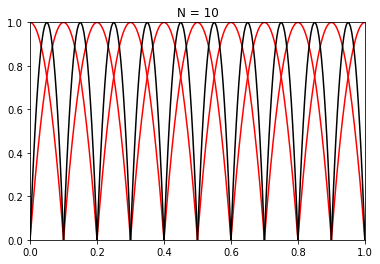

In [3]:
def phi1(x, j, N): #phi_
    p = subprocess.Popen(f'{bin_path}/phi1_phi2 1 {x} {j} {N}', shell=True)
    p.wait()

    with open(f'{out_path}/out_phi1_phi2.txt') as f:
        c = f.read().replace("\n", " ").split(" ")
    return float(c[0])
def phi2(x, j, N): #phi^
    p = subprocess.Popen(f'{bin_path}/phi1_phi2 2 {x} {j} {N}', shell=True)
    p.wait()

    with open(f'{out_path}/out_phi1_phi2.txt') as f:
        c = f.read().replace("\n", " ").split(" ")
    return float(c[0])

N = 10
plt.figure(N)
plt.axis([0, 1, 0, 1])
plt.title(f'N = {str(N)}')
for j in range(0, N+1): # j = 0,...,N
    phiY = np.array([phi1(x,j,N) for x in np.linspace(0, 1, 256)])
    plt.plot(np.linspace(0, 1, 256), phiY, color='red')
for j in range(0, N+1): # j = 0,...,N
    phiY = np.array([phi2(x,j,N) for x in np.linspace(0, 1, 256)])
    plt.plot(np.linspace(0, 1, 256), phiY, color='black')
plt.savefig('./pdf/basis_function.pdf', transparent=True)

plt.grid(False)
plt.show()

$$
		(L\overline{\varphi}_j^h, \overline{\varphi}_j^h) =
		\int_{x_{j-1}}^{x_{j+1}} [(\overline{\varphi}_j^h)'(\overline{\varphi}_j^h)' +
		\overline{\varphi}_j^h\overline{\varphi}_j^h]dx =
		\frac{16h}{15} + \frac{8}{3h}
$$
$$
		(L\widehat{\varphi}_j^h, \widehat{\varphi}_j^h) =
		\int_{x_{j}}^{x_{j+1}} [(\widehat{\varphi}_j^h)'(\widehat{\varphi}_j^h)' +
		\widehat{\varphi}_j^h\widehat{\varphi}_j^h]dx =
		\frac{8h}{15} + \frac{16}{3h}
$$
$$
		(L\overline{\varphi}_j^h, \widehat{\varphi}_{j+1}^h) =
		\int_{x_{j}}^{x_{j+1}} [(\overline{\varphi}_j^h)'(\widehat{\varphi}_{j+1}^h)' +
		\overline{\varphi}_j^h\widehat{\varphi}_{j+1}^h]dx =
		\frac{7h}{15} + \frac{4}{3h},\ j = 2k
$$
$$
		(L\widehat{\varphi}_j^h, \overline{\varphi}_{j+2}^h) =
		\int_{x_{j}}^{x_{j+1}} [(\widehat{\varphi}_j^h)'(\overline{\varphi}_{j+2}^h)' +
		\widehat{\varphi}_j^h\overline{\varphi}_{j+2}^h]dx =
		\frac{7h}{15} + \frac{4}{3h},\ j = 2k
$$
$$
	\overline{b}_j = (f, \overline{\varphi}_j^h) = 
		\int_{0}^{1} f\overline{\varphi}_j^h \, dx =
		\frac{4}{3} hf(hj) 
$$
$$
	\widehat{b}_j = (f, \widehat{\varphi}_j^h) = 
		\int_{0}^{1} f\widehat{\varphi}_j^h \, dx = 
		\frac{2}{3} hf(hj)
$$

$$
    U_{analytical} = \sin (\pi x^2)
$$
$$
    f(x) = -2\pi \cos (\pi x^2) + \sin (\pi x^2) + 4 \pi^2 x^2 \sin (\pi x^2)
$$

$$
    u(x) = \sum\limits_{j = 0}^{2N-1} c_j \varphi_j^h(x)
$$

In [5]:
def Int(num, N):
    p = subprocess.Popen(f'{bin_path}/int {num} {N}', shell=True)
    p.wait()

    with open(f'{out_path}/out_int.txt') as f:
        c = f.read().replace("\n", " ").split(" ")
    return float(c[0])

def b1(j, N):
    p = subprocess.Popen(f'{bin_path}/b1_b2 1 {j} {N}', shell=True)
    p.wait()

    with open(f'{out_path}/out_b1_b2.txt') as f:
        c = f.read().replace("\n", " ").split(" ")
    return float(c[0])
def b2(j, N):
    p = subprocess.Popen(f'{bin_path}/b1_b2 2 {j} {N}', shell=True)
    p.wait()

    with open(f'{out_path}/out_b1_b2.txt') as f:
        c = f.read().replace("\n", " ").split(" ")
    return float(c[0])

def u_anal(x):
    p = subprocess.Popen(f'{bin_path}/u 0 {x} 0 0 0 0 0', shell=True)
    p.wait()

    with open(f'{out_path}/out_u.txt') as f:
        c = f.read().replace("\n", " ").split(" ")
    return float(c[0])

def u(x, c, N):
    for j in range (0, N):
        if (x>=j/N and x<=(j+1)/N):
            p = subprocess.Popen(f'{bin_path}/u 1 {x} {j} {c[2*j]} {c[2*j+1]} {c[2*j+2]} {N}', shell=True)
            p.wait()
            break

    with open(f'{out_path}/out_u.txt') as f:
        c = f.read().replace("\n", " ").split(" ")
    return float(c[0])

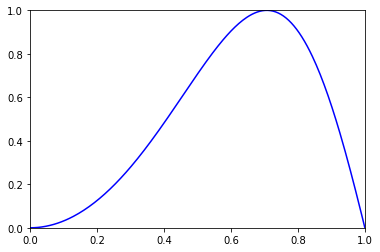

In [6]:
plt.figure(256)
plt.axis([0, 1, 0, 1])
phiY = np.array([u_anal(x) for x in np.linspace(0, 1, 256)])
plt.plot(np.linspace(0, 1, 256), phiY, color='blue')
plt.savefig('./pdf/anal.pdf', transparent=True)

plt.grid(False)
plt.show()

In [9]:
def A_b(A, b, N):
    h = 1/N
    
    #граничное условие 1
    A[0][0]=1 
    A[0][1]=4/h
    A[0][2]=2/h
    b[0]=0
    
    #граничное условие 2
    A[2*N][2*N]=1 
    b[2*N]=0

    Int1 = Int(1,N)
    Int2 = Int(2,N)
    Int3 = Int(3,N)
    Int4 = Int(4,N)
    Int5 = Int(5,N)
    
    for i in range (1, 2*N):
        b1_ret = b1(i, N)
        b2_ret = b2(i, N)
        for j in range(1, 2*N):
            if (i%2==1):
                b[i] = b2_ret
                if (i == j):
                        A[i][j] = Int2
                elif (i == j-1):
                    A[i][j] = Int3
                elif (i == j+1):
                    A[i][j] = Int4
            else:
                b[i] = b1_ret
                if (i == j):
                    A[i][j] = Int1
                elif (i == j+2):
                    A[i][j] = Int5
                elif (i == j-2):
                    A[i][j] = Int5
                elif (i == j-1):
                    A[i][j] = Int3
                elif (i == j+1):
                    A[i][j] = Int4
        A[i][i-1] = Int3
        A[i][i+1] = Int4
    return A, b

5: 9.12989e-02


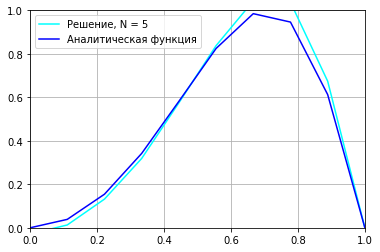

10: 2.59366e-02


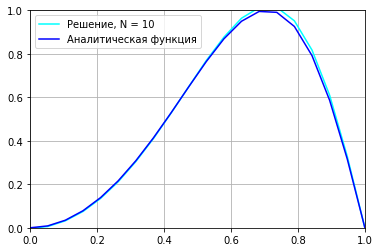

20: 6.79164e-03


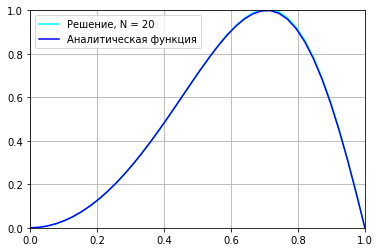

In [10]:
N_list = [5, 10, 20]
for N in N_list:
    A = np.zeros((2*N+1, 2*N+1))
    c = np.zeros(2*N+1)
    b = np.zeros(2*N+1)
    A, b = A_b(A, b, N)

    with open(f'{out_path}/in_A.txt', "w") as f:
        for i in range(0, 2*N+1):
            for j in range(0, 2*N+1):
                f.write(f'{A[i][j]} ')
            f.write(f'\n')

    with open(f'{out_path}/in_b.txt', "w") as f:
        for i in range(0, 2*N+1):
            f.write(f'{b[i]}\n')

    p = subprocess.Popen(f'{bin_path}/matr {2*N+1}', shell=True)
    p.wait()

    with open(f'{out_path}/out_с.txt') as f:
        lines = f.read()
        lines_split = lines.splitlines()
    for i in range(0, 2*N+1):
        c[i] = np.double(lines_split[i])

    u_a = np.array([u(x, c, N) for x in np.linspace(0, 1, 2*N)])
    analytical = np.array([u_anal(x) for x in np.linspace(0, 1, 2*N)])
    
    norm = np.max(np.abs(u_a-analytical))
    print(f'{N}: {"{:.5e}".format(norm)}')
    
    plt.figure(2*N)
    plt.axis([0, 1, 0, 1])
    plt.plot(np.linspace(0, 1, 2*N), u_a, color='cyan', label=f'Решение, N = {str(N)}')
    plt.plot(np.linspace(0, 1, 2*N), analytical, color='blue', label=f'Аналитическая функция')
    plt.legend()
    plt.savefig(f'./pdf/result_N={str(N)}.pdf', transparent=True)
    plt.grid(True)
    plt.show()

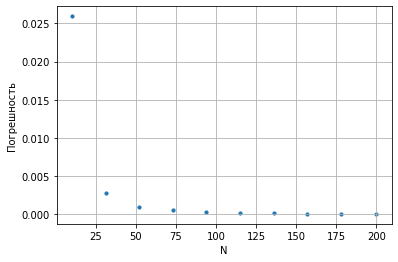

In [11]:
N_list = np.int64([x for x in np.linspace(10, 200, 10)])
norm = []
for N in N_list:
    A = np.zeros((2*N+1, 2*N+1))
    c = np.zeros(2*N+1)
    b = np.zeros(2*N+1)
    A, b = A_b(A, b, N)
    c = np.linalg.solve(A, b)
    
    u_a = np.array([u(x, c, N) for x in np.linspace(0, 1, 2*N)])
    analytical = np.array([u_anal(x) for x in np.linspace(0, 1, 2*N)])
    
    norm.append(np.max(np.abs(u_a-analytical)))
    
plt.figure(len(N_list))
plt.xlabel('N')
plt.ylabel('Погрешность')
plt.scatter(N_list, norm, s=10)
plt.savefig('./pdf/norm.pdf', transparent=True)
plt.grid(True)
plt.show()